In [ ]:
#Load a few libr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv("EURUSD Stop Out Prevention Market Data.csv")
data

NameError: name 'pd' is not defined

In [3]:
data.isna().any()

Time     False
Open     False
High     False
Low      False
Close    False
MA 14    False
dtype: bool

In [4]:
LOOK_AHEAD = 48
data['Target'] = data['MA 14'].shift(-LOOK_AHEAD)
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [5]:
#Let's entirely drop off the last 2 years of data
data.iloc[-((48 * 365 * 2) + (48 * 31 * 2) + (48 * 14) - (3)):,:]

Time     Open     High      Low    Close     MA 14  \
57266  2022.01.02 22:00:00  1.13629  1.13718  1.13625  1.13681  1.137215   
57267  2022.01.02 22:30:00  1.13681  1.13733  1.13681  1.13710  1.137200   
57268  2022.01.02 23:00:00  1.13709  1.13784  1.13698  1.13735  1.137220   
57269  2022.01.02 23:30:00  1.13735  1.13745  1.13695  1.13732  1.137233   
57270  2022.01.03 00:00:00  1.13732  1.13760  1.13666  1.13667  1.137158   
...                    ...      ...      ...      ...      ...       ...   
95946  2025.02.11 07:30:00  1.03056  1.03079  1.03012  1.03034  1.030378   
95947  2025.02.11 08:00:00  1.03034  1.03088  1.02998  1.03073  1.030425   
95948  2025.02.11 08:30:00  1.03073  1.03198  1.03068  1.03182  1.030611   
95949  2025.02.11 09:00:00  1.03182  1.03219  1.03125  1.03140  1.030716   
95950  2025.02.11 09:30:00  1.03139  1.03205  1.03130  1.03180  1.030861   

         Target  
57266  1.130038  
57267  1.129964  
57268  1.129964  
57269  1.129997  
57270  1.130054  
...         ...  
95946  1.036214  
95947  1.036341  
95948  1.036445  
95949  1.036490  
95950  1.036607  

[38685 rows x 7 columns]

In [6]:
#Let's entirely drop off the last 2 years of data
_ = data.iloc[-((48 * 365 * 2) + (48 * 31 * 2) + (48 * 14) - (3)):,:]
data = data.iloc[:-((48 * 365 * 2) + (48 * 31 * 2) + (48 * 14) - (3)),:]
data

Time     Open     High      Low    Close     MA 14  \
0      2017.05.22 22:30:00  1.12373  1.12410  1.12362  1.12363  1.123596   
1      2017.05.22 23:00:00  1.12363  1.12394  1.12305  1.12311  1.123531   
2      2017.05.22 23:30:00  1.12312  1.12419  1.12301  1.12384  1.123572   
3      2017.05.23 00:00:00  1.12384  1.12418  1.12369  1.12381  1.123604   
4      2017.05.23 00:30:00  1.12382  1.12437  1.12361  1.12370  1.123617   
...                    ...      ...      ...      ...      ...       ...   
57261  2021.12.31 18:30:00  1.13814  1.13853  1.13810  1.13849  1.136502   
57262  2021.12.31 19:00:00  1.13848  1.13860  1.13825  1.13826  1.136736   
57263  2021.12.31 19:30:00  1.13827  1.13854  1.13799  1.13829  1.136943   
57264  2021.12.31 20:00:00  1.13829  1.13852  1.13822  1.13836  1.137132   
57265  2021.12.31 20:30:00  1.13837  1.13855  1.13809  1.13822  1.137277   

         Target  
0      1.119274  
1      1.119168  
2      1.119110  
3      1.118978  
4      1.118827  
...         ...  
57261  1.130488  
57262  1.130380  
57263  1.130284  
57264  1.130211  
57265  1.130130  

[57266 rows x 7 columns]

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,TimeSeriesSplit,cross_val_score

In [8]:
tscv = TimeSeriesSplit(n_splits=5,gap=LOOK_AHEAD)

In [9]:
X = data.columns[1:-1]
y = data.columns[-1:]

In [10]:
X

Index(['Open', 'High', 'Low', 'Close', 'MA 14'], dtype='object')

In [11]:
y

Index(['Target'], dtype='object')

In [12]:
train , test = train_test_split(data,test_size=0.5,shuffle=False)

In [13]:
train_X = train.loc[:,X]
train_y = train.loc[:,y]

test_X = test.loc[:,X]
test_y = test.loc[:,y]

In [14]:
mean_scores = train_X.mean()
std_scores = train_X.std()

In [15]:
train_X = ((train_X - mean_scores) / std_scores)
test_X = ((test_X - mean_scores) / std_scores)

In [16]:
MAX_POWER = 15
results = pd.DataFrame(index=["Train","Test"],columns=[np.arange(0,MAX_POWER)])

In [65]:
#Classical Inputs
for i in np.arange(0,MAX_POWER):
    print(i)
    model = MLPRegressor(hidden_layer_sizes=(5,10,4,2),solver="adam",activation="relu",max_iter=(2**i),early_stopping=False)
    results.iloc[0,i] = np.mean(np.abs(cross_val_score(model,train_X.loc[:,:],train_y.values.ravel(),cv=tscv)))
    results.iloc[1,i] = np.mean(np.abs(cross_val_score(model,test_X.loc[:,:],test_y.values.ravel(),cv=tscv)))
    results

0
1
2
3


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the 

4


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and 

5


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and 

6


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (64) reached and 

7


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached 

8


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached 

9


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached 

10


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reac

11


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2048) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2048) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2048) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2048) reac

12


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4096) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4096) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4096) reached and the optimization hasn't converged yet.
  warnings.warn(


13


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8192) reached and the optimization hasn't converged yet.
  warnings.warn(


14


c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16384) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16384) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16384) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
results

0             1             2             3             4   \
Train  19675.492496  19765.297106    19609.7644  19511.588484  19859.734807   
Test   13171.519137  14113.252994  14428.159203  13649.157525  13655.643066   

                 5             6             7             8            9   \
Train   19942.30371  18831.617167  10703.554068   4930.771654  1639.952482   
Test   12919.773346  11472.770729   5878.964564  11293.444345  3788.388634   

                10           11           12           13          14  
Train  1389.615052  2938.371438     1.536765     2.193895   30.553918  
Test   2545.368419  3599.364028  2240.598518  1041.641869  882.696622

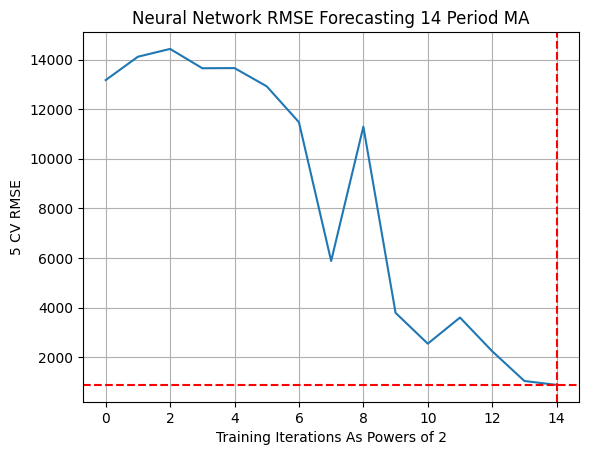

In [79]:
plt.title("Neural Network RMSE Forecasting 14 Period MA")
plt.ylabel("5 CV RMSE")
plt.xlabel("Training Iterations As Powers of 2")
plt.grid()
sns.lineplot(np.array(results.iloc[1,:]).transpose())
plt.axhline(results.min(1)[1],linestyle='--',color='red')
plt.axvline(14,linestyle='--',color='red')

Preparing To Export To ONNX

In [17]:
import onnx
import skl2onnx 
from skl2onnx.common.data_types import FloatTensorType

In [18]:
model = MLPRegressor(hidden_layer_sizes=(5,10,4,2),solver="adam",activation="relu",max_iter=(2**14),early_stopping=False)

In [20]:
mean_scores = data.loc[:,X].mean()
std_scores = data.loc[:,X].std()

mean_scores.to_csv("EURUSD StopOut Mean.csv")
std_scores.to_csv("EURUSD StopOut Std.csv")

In [21]:
data

Time     Open     High      Low    Close     MA 14  \
0      2017.05.22 22:30:00  1.12373  1.12410  1.12362  1.12363  1.123596   
1      2017.05.22 23:00:00  1.12363  1.12394  1.12305  1.12311  1.123531   
2      2017.05.22 23:30:00  1.12312  1.12419  1.12301  1.12384  1.123572   
3      2017.05.23 00:00:00  1.12384  1.12418  1.12369  1.12381  1.123604   
4      2017.05.23 00:30:00  1.12382  1.12437  1.12361  1.12370  1.123617   
...                    ...      ...      ...      ...      ...       ...   
57261  2021.12.31 18:30:00  1.13814  1.13853  1.13810  1.13849  1.136502   
57262  2021.12.31 19:00:00  1.13848  1.13860  1.13825  1.13826  1.136736   
57263  2021.12.31 19:30:00  1.13827  1.13854  1.13799  1.13829  1.136943   
57264  2021.12.31 20:00:00  1.13829  1.13852  1.13822  1.13836  1.137132   
57265  2021.12.31 20:30:00  1.13837  1.13855  1.13809  1.13822  1.137277   

         Target  
0      1.119274  
1      1.119168  
2      1.119110  
3      1.118978  
4      1.118827  
...         ...  
57261  1.130488  
57262  1.130380  
57263  1.130284  
57264  1.130211  
57265  1.130130  

[57266 rows x 7 columns]

In [22]:
data[X] = ((data.loc[:,X] - mean_scores) / std_scores)

C:\Users\Westwood\AppData\Local\Temp\ipykernel_4228\3807495636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[X] = ((data.loc[:,X] - mean_scores) / std_scores)


In [23]:
data

Time      Open      High       Low     Close     MA 14  \
0      2017.05.22 22:30:00 -0.833117 -0.834961 -0.824839 -0.835600 -0.836790   
1      2017.05.22 23:00:00 -0.835574 -0.838889 -0.838851 -0.848376 -0.838382   
2      2017.05.22 23:30:00 -0.848103 -0.832751 -0.839835 -0.830441 -0.837370   
3      2017.05.23 00:00:00 -0.830414 -0.832997 -0.823118 -0.831178 -0.836591   
4      2017.05.23 00:30:00 -0.830906 -0.828332 -0.825085 -0.833881 -0.836276   
...                    ...       ...       ...       ...       ...       ...   
57261  2021.12.31 18:30:00 -0.479096 -0.480683 -0.468874 -0.470524 -0.519575   
57262  2021.12.31 19:00:00 -0.470743 -0.478965 -0.465187 -0.476174 -0.513812   
57263  2021.12.31 19:30:00 -0.475903 -0.480438 -0.471578 -0.475437 -0.508720   
57264  2021.12.31 20:00:00 -0.475411 -0.480929 -0.465924 -0.473717 -0.504077   
57265  2021.12.31 20:30:00 -0.473446 -0.480192 -0.469120 -0.477157 -0.500512   

         Target  
0      1.119274  
1      1.119168  
2      1.119110  
3      1.118978  
4      1.118827  
...         ...  
57261  1.130488  
57262  1.130380  
57263  1.130284  
57264  1.130211  
57265  1.130130  

[57266 rows x 7 columns]

In [24]:
model.fit(data.loc[:,X],data.loc[:,'Target'].values.ravel())

MLPRegressor(hidden_layer_sizes=(5, 10, 4, 2), max_iter=16384)

In [25]:
initial_types = [("float_input",FloatTensorType([1,5]))]

In [26]:
model_proto = skl2onnx.convert_sklearn(model,initial_types=initial_types,target_opset=12)

In [27]:
onnx.save(model_proto,"EURUSD StopOut Prevention Model.onnx")